In [1]:
%load_ext autoreload
%autoreload 2

In [109]:
from models.preprocessors.sent_tokenizer import RuSentTokenizer
from models.preprocessors.unfold import Unfold
from models.preprocessors.parts_to_bounds import PartsToBounds
from models.preprocessors.relative_bounds import RelativeBounds
from models.preprocessors.bounds_to_tags_bio import BoundsToTagsBio

from dataset_readers.medicine_light_reader import MedicineLightDatasetReader

from deeppavlov.models.tokenizers.lazy_tokenizer import LazyTokenizer
from deeppavlov.models.preprocessors.bert_preprocessor import BertNerPreprocessor

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

In [110]:
PATH = '../data/clinical'

In [5]:
ANN1 = '/home/ivb/Repos/ner_medical/data/clinical/example/1.ann'
ANN2 = '/home/ivb/Repos/ner_medical/data/clinical/example/2.ann'
TXT1 = '/home/ivb/Repos/ner_medical/data/clinical/example/1.txt'
TXT2 = '/home/ivb/Repos/ner_medical/data/clinical/example/2.txt'

In [6]:
with open(TXT1, 'r') as f:
    txt1 = f.read()
with open(TXT2, 'r') as f:
    txt2 = f.read()

In [7]:
tags = ['Disease']

tag_bounds1 = []
with open(ANN1, 'r') as f:
    for line in f:
        if line.startswith('T'):
            _, tag, s, e, _ = line.split(maxsplit=4)
            if tag in tags:
                s, e = int(s), int(e)
                tag_bounds1.append((s, e, tag))
tag_bounds1 = sorted(tag_bounds1)

tag_bounds2 = []
with open(ANN2, 'r') as f:
    for line in f:
        if line.startswith('T'):
            _, tag, s, e, _ = line.split(maxsplit=4)
            if tag in tags:
                s, e = int(s), int(e)
                tag_bounds2.append((s, e, tag))
tag_bounds2 = sorted(tag_bounds2)

In [8]:
batch_text = [txt1, txt2]
batch_tag_text_bounds = [tag_bounds1, tag_bounds2]

In [9]:
batch_text

['НАХОДИЛСЯ НА ЛЕЧЕНИИ  С  9.10.41  ПО     20.10.41 г.\nДИАГНОЗ: Поллиноз: бронхиальная астма, риноконъюнктивальный синдром, ремиссия. Аллергический ринит, персистирующая форма, ремиссия. Искривление носовой перегородки. Вторичные изменения поджелудочной железы. \n\nЭПИКРИЗ\nРебенок поступил в отделение впервые с жалобами на эпизоды малопродуктивного кашля, приступы затруднения дыхания на фоне респираторной инфекции; симптомы ринита, конъюнктивита, малопродуктивный кашель и отеки Квинке в весенне-летний период.\nИз анамнеза известно: ребенок от 1-й беременности, протекавшей физиологически, срочных родов путем кесарева сечения. С рождения на искусственном вскармливании. Раннее психомоторное развитие по возрасту. Профилактические прививки по графику.\nС первых месяцев отмечались проявления атопии, купировавшиеся приемом антигистаминных препаратов, местными средствами, коррекцией диеты. К 3-4 годам кожные проявления аллергии уже не беспокоили.\nС раннего возраста на фоне респираторных инф

In [10]:
batch_tag_text_bounds

[[(62, 70, 'Disease'),
  (72, 90, 'Disease'),
  (92, 120, 'Disease'),
  (132, 151, 'Disease'),
  (185, 196, 'Disease'),
  (218, 258, 'Disease'),
  (391, 413, 'Disease'),
  (424, 430, 'Disease'),
  (432, 445, 'Disease'),
  (473, 485, 'Disease'),
  (791, 797, 'Disease'),
  (919, 927, 'Disease'),
  (974, 996, 'Disease'),
  (1051, 1080, 'Disease'),
  (1133, 1136, 'Disease'),
  (1157, 1180, 'Disease'),
  (1321, 1329, 'Disease'),
  (1331, 1349, 'Disease'),
  (1351, 1379, 'Disease'),
  (1393, 1395, 'Disease'),
  (1439, 1457, 'Disease'),
  (1538, 1560, 'Disease'),
  (1775, 1786, 'Disease'),
  (1865, 1874, 'Disease'),
  (1915, 1928, 'Disease'),
  (1930, 1942, 'Disease'),
  (2004, 2020, 'Disease')],
 [(92, 123, 'Disease'),
  (166, 174, 'Disease'),
  (176, 204, 'Disease'),
  (216, 235, 'Disease'),
  (263, 283, 'Disease'),
  (295, 316, 'Disease'),
  (480, 502, 'Disease'),
  (513, 519, 'Disease'),
  (522, 535, 'Disease'),
  (630, 648, 'Disease'),
  (957, 960, 'Disease'),
  (975, 998, 'Disease'),
  

In [54]:
data = MedicineLightDatasetReader().read(
    "/home/ivb/Repos/ner_medical/data/clinical/",
    ["main/**/*", "main1/**/*", "main2/**/*", "main3/**/*"],
    ["test/**/*"],
    ["test/**/*"],
    ["main/1/14.txt", "main2/1.txt", "main2/2.txt", "main2/3.txt", "main3/0.txt", "main3/1.txt", "main1/4/44.txt"],
    ['Disease'],
    False
)

train
/home/ivb/Repos/ner_medical/data/clinical/main/4/41.txt
/home/ivb/Repos/ner_medical/data/clinical/main/4/49.txt
/home/ivb/Repos/ner_medical/data/clinical/main/4/46.txt
/home/ivb/Repos/ner_medical/data/clinical/main/5/53.txt
/home/ivb/Repos/ner_medical/data/clinical/main/1/13.txt
/home/ivb/Repos/ner_medical/data/clinical/main/5/50.txt
/home/ivb/Repos/ner_medical/data/clinical/main/4/48.txt
/home/ivb/Repos/ner_medical/data/clinical/main/0/7.txt
/home/ivb/Repos/ner_medical/data/clinical/main/3/34.txt
/home/ivb/Repos/ner_medical/data/clinical/main/2/25.txt
/home/ivb/Repos/ner_medical/data/clinical/main/2/28.txt
/home/ivb/Repos/ner_medical/data/clinical/main/2/26.txt
/home/ivb/Repos/ner_medical/data/clinical/main/1/12.txt
/home/ivb/Repos/ner_medical/data/clinical/main/3/33.txt
/home/ivb/Repos/ner_medical/data/clinical/main/2/23.txt
/home/ivb/Repos/ner_medical/data/clinical/main/4/43.txt
/home/ivb/Repos/ner_medical/data/clinical/main/3/39.txt
/home/ivb/Repos/ner_medical/data/clinical/m

valid
/home/ivb/Repos/ner_medical/data/clinical/test/5.txt
/home/ivb/Repos/ner_medical/data/clinical/test/7.txt
/home/ivb/Repos/ner_medical/data/clinical/test/6.txt
/home/ivb/Repos/ner_medical/data/clinical/test/3.txt
/home/ivb/Repos/ner_medical/data/clinical/test/4.txt
test
/home/ivb/Repos/ner_medical/data/clinical/test/5.txt
/home/ivb/Repos/ner_medical/data/clinical/test/7.txt
/home/ivb/Repos/ner_medical/data/clinical/test/6.txt
/home/ivb/Repos/ner_medical/data/clinical/test/3.txt
/home/ivb/Repos/ner_medical/data/clinical/test/4.txt


In [62]:
data['train'][0]

('ДИАГНОЗ: Бронхиальная астма, атопическая, легкое персистирующее течение, обострение.',
 [(9, 40, 'Disease')])

In [12]:
batch_text = [x for x, y in data['train']]#[-41:-40]
batch_tag_text_bounds = [y for x, y in data['train']]#[-41:-40]

In [53]:
print(batch_text[0])

ДИАГНОЗ: Бронхиальная астма, атопическая, легкое персистирующее течение, обострение. Аллергический ринит, персистирующий. Искривление носовой перегородки. Хронический тонзиллит, компенсированная форма. Варикоцеле слева. Перелом среднего пальца правой кисти.
ЭПИКРИЗ
Мальчик поступил в клинику впервые с жалобами на приступы затруднения дыхания на фоне значительной физической нагрузки, при ОРИ; болезненность 3-го пальца правой кисти. 
Из анамнеза известно: мальчик от беременности, протекавшей с угрозой прерывания, срочных самостоятельных родов. Масса при рождении: 3650 г; рост 53 см. Раннее психомоторное развитие по возрасту. На грудном вскармливании до 3 мес. Прививки по графику. Перенесенные заболевания: коклюш, ветряная оспа, краснуха.
Из анамнеза: на первом году проявления атопического дерматита, купировавшиеся топическими стероидами и приемом антигистаминных препаратов. 
С возраста 1 года 3 мес. отмечаются частые ОРИ (до 5-6 раз в год) с обструктивным синдромом (со слов матери). В те

In [28]:
sent_tokenizer = RuSentTokenizer()
word_tokenizer = LazyTokenizer()
bert_ner_preprocessor = BertNerPreprocessor(
    vocab_file="~/Repos/ner_medical/.deeppavlov/downloads/bert_models/rubert_cased_L-12_H-768_A-12_v1/vocab.txt",
    do_lower_case=False,
    max_seq_length=512,
    max_subword_length=15,
    token_masking_prob=0.0
)

batch_sents = sent_tokenizer(batch_text)
batch_sent = Unfold(batch_sents)
batch_words = word_tokenizer(batch_sent)

batch_word_bounds = PartsToBounds(batch_sent, batch_words)
batch_sent_bounds = PartsToBounds(batch_text, batch_sents)
batch_tag_sents_bounds = RelativeBounds(batch_sent_bounds, batch_tag_text_bounds)
batch_tag_sent_bounds = Unfold(batch_tag_sents_bounds)
batch_tags = BoundsToTagsBio(batch_word_bounds, batch_tag_sent_bounds)

x_tokens, x_subword_tokens, x_subword_tok_ids, startofword_markers, attention_mask = \
    bert_ner_preprocessor(batch_words)

In [ ]:
glob.glob('../data/**')
sent_tokenizer = RuSentTokenizer()
word_tokenizer = LazyTokenizer()

batch_sents = sent_tokenizer(batch_text)
batch_sent = Unfold(batch_sents)
batch_words = word_tokenizer(batch_sent)

batch_word_bounds = PartsToBounds(batch_sent, batch_words)
batch_sent_bounds = PartsToBounds(batch_text, batch_sents)
batch_tag_sents_bounds = RelativeBounds(batch_sent_bounds, batch_tag_text_bounds)
batch_tag_sent_bounds = Unfold(batch_tag_sents_bounds)
batch_tags = BoundsToTagsBio(batch_word_bounds, batch_tag_sent_bounds)

In [136]:
sent_tokenizer = RuSentTokenizer()
word_tokenizer = LazyTokenizer()

ok_list = []
error_list = []
empty_list = []
test_list = []

for path in sorted(Path(PATH).glob('**/*')):
    path = str(path.absolute())
    if path.endswith('.txt'):
        path_ann = path.replace('.txt', '.ann')
        print(path)
        with open(path_ann, 'r') as f:
            if len(f.read()) == 0:
                print('EMPTY\n')
                empty_list.append(path)
                continue
        try:
            tag_bounds = []
            with open(path_ann, 'r') as f:
                for line in f:
                    if line.startswith('T'):
                        _, tag, s, e, _ = line.split(maxsplit=4)
                        if tag in ['Disease']:
                            s, e = int(s), int(e)
                            tag_bounds.append((s, e, tag))
            tag_bounds = sorted(tag_bounds)
            with open(path, 'r') as f:
                txt = f.read()

            batch_text = [txt]
            batch_tag_text_bounds = [tag_bounds]

            batch_sents = sent_tokenizer(batch_text)
            batch_sent = Unfold(batch_sents)
            batch_words = word_tokenizer(batch_sent)

            batch_word_bounds = PartsToBounds(batch_sent, batch_words)
            batch_sent_bounds = PartsToBounds(batch_text, batch_sents)
            batch_tag_sents_bounds = RelativeBounds(batch_sent_bounds, batch_tag_text_bounds)
            batch_tag_sent_bounds = Unfold(batch_tag_sents_bounds)
            batch_tags = BoundsToTagsBio(batch_word_bounds, batch_tag_sent_bounds)
        except:
            print('PARSING ERROR')
            error_list.append(path)
        else:
            print('OK')
            if 'test' in path:
                test_list.append(path)
            else:
                ok_list.append(path)
        print()

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/example/1.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/example/2.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/0.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/1.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/2.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/3.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/4.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/5.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/6.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/7.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/8.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/9.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/1/10.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/1

OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/20.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/21.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/22.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/23.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/24.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/25.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/26.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/27.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/28.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/29.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/3/30.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/3/31.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/3/32.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/c

OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/4/45.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/4/46.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/4/47.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/4/48.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/4/49.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/5/50.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/5/51.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/5/52.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/5/53.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/5/54.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/5/55.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/0/0.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/0/1.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/c

OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/0/9.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/10.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/11.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/12.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/13.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/14.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/15.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/16.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/17.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/18.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/19.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/2/20.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/2/21.txt
OK

/home/ivb/Repos/ner_medical/noteboo

OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/2/26.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/2/27.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/2/28.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/2/29.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/3/30.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/3/31.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/3/32.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/3/33.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/3/34.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/3/35.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/3/36.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/3/37.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/3/38.txt
OK

/home/ivb/Repos/ner_medical/notebo

ERROR:models.preprocessors.bounds_to_tags_bio:Something went wrong! 52 54 33 53
ERROR:models.preprocessors.relative_bounds:Something went wrong! 5383 5415 5392 5420
ERROR:models.preprocessors.bounds_to_tags_bio:Something went wrong! 44 52 30 50


OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/4/42.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/4/43.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/4/44.txt
PARSING ERROR

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main2/1.txt
PARSING ERROR

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main2/2.txt
PARSING ERROR

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main2/3.txt
PARSING ERROR

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main2/4.txt
OK

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/0.txt
PARSING ERROR

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/1.txt


ERROR:models.preprocessors.bounds_to_tags_bio:Something went wrong! 40 47 14 45


PARSING ERROR

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/10.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/11.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/12.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/13.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/14.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/15.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/16.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/17.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/18.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/19.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/2.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/20.txt
EMPTY

/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/21.txt
EMPTY

/home/ivb/R

In [137]:
len(ok_list)

101

In [138]:
len(empty_list)

49

In [139]:
error_list

['/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/1/14.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/4/44.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main2/1.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main2/2.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main2/3.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/0.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main3/1.txt']

In [140]:
test_list

['/home/ivb/Repos/ner_medical/notebooks/../data/clinical/test/3.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/test/4.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/test/5.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/test/6.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/test/7.txt']

In [201]:
os.makedirs(os.path.join(PATH, 'filelists'), exist_ok=True)

with open(os.path.join(PATH, 'filelists', 'ok_filelist.txt'), 'w') as f:
    for path in sorted(ok_list):
        f.write(path)
        f.write('\n')

with open(os.path.join(PATH, 'filelists', 'empty_filelist.txt'), 'w') as f:
    for path in sorted(empty_list):
        f.write(path)
        f.write('\n')
    
with open(os.path.join(PATH, 'filelists', 'error_filelist.txt'), 'w') as f:
    for path in sorted(error_list):
        f.write(path)
        f.write('\n')
        
with open(os.path.join(PATH, 'filelists', 'test_filelist.txt'), 'w') as f:
    for path in sorted(test_list):
        f.write(path)
        f.write('\n')

In [143]:
random.seed(42)
ok_list = sorted(ok_list)
random.shuffle(ok_list)

In [144]:
ok_list

['/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/4/43.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/3/31.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/0/7.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/7.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/10.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/2/29.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/example/2.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/2/22.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/1/13.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/2/23.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main1/1/17.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main/0/8.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/clinical/main2/4.txt',
 '/home/ivb/Repos/ner_medical/notebooks/../data/cli

In [148]:
test2_list = ok_list[:31]
train_list = ok_list[31:]

In [149]:
with open(os.path.join(PATH, 'filelists', 'test2_filelist.txt'), 'w') as f:
    for path in sorted(test2_list):
        f.write(path)
        f.write('\n')

In [203]:
len(train_list)

70

In [204]:
with open(os.path.join(PATH, 'filelists', 'train_filelist.txt'), 'w') as f:
    for path in sorted(train_list):
        f.write(path)
        f.write('\n')

In [199]:
for i, path in enumerate(train_list):
    fold = i % 5
    for j in range(5):
        if j == fold:
            p = os.path.join(PATH, 'filelists', 'fold-{}_valid_filelist.txt'.format(j))
        else:
            p = os.path.join(PATH, 'filelists', 'fold-{}_train_filelist.txt'.format(j))
        with open(p, 'a') as f:
            f.write(path + '\n')

In [202]:
with open(os.path.join(PATH, 'filelists', 'lm_filelist.txt'), 'w') as f:
    for path in sorted(train_list):
        f.write(path)
        f.write('\n')
    for path in sorted(empty_list):
        f.write(path)
        f.write('\n')

In [16]:
len(batch_words), len(batch_tags)

(4195, 4195)

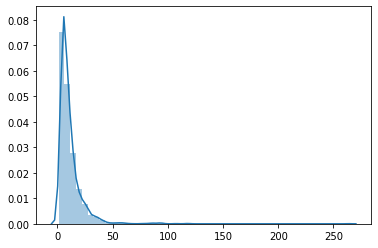

In [44]:
sns.distplot([len(words) for words in batch_words])

In [45]:
max([len(words) for words in batch_words])

264

In [46]:
np.mean(np.array([len(words) for words in batch_words]) > 64)

0.006436233611442193

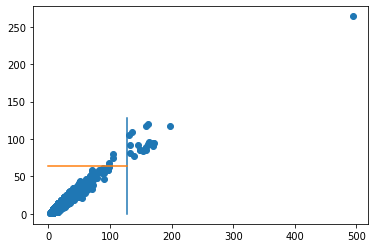

In [43]:
plt.scatter([len(words) for words in x_subword_tokens], [len(words) for words in batch_words])
plt.plot([128, 128], [0, 128])
plt.plot([0, 128], [64, 64])

In [196]:
data = MedicineLightDatasetReader().read(
    "/home/ivb/Repos/ner_medical/data/clinical/",
    "filelists/fold-0_train_filelist.txt",
    "filelists/fold-0_valid_filelist.txt",
    "filelists/test2_filelist.txt",
    ['Disease'],
    False,
    False
)

In [197]:
data.keys()

dict_keys(['train', 'valid', 'test'])

In [198]:
len(data['train'])

2248

In [195]:
len(data['test'])

1394

In [185]:
data['train'][6]

('Заключение: УЗ – картина выраженной гиперсекреции в желудке (косвенный признак гастрита).',
 [(79, 87, 'Disease')])

In [186]:
data['train'][6][0][79:87]

'гастрита'

In [13]:
class A:
    def f(self):
        print('A')

class B(A):
    def f(self):
        print('B')

class C(B):
    def f(self):
        super(B, self).f()

In [14]:
c = C()

In [15]:
c.f()

A


In [ ]:
"y_predicted": [["ВОЗРАСТ", ":", "9", "лет", "11", "месяцев", "(", "19.04.2042", ")"], ["O", "O", "O", "O", "O", "O", "O", "O", "O"]], "y_true": [[102, 139, "Disease"], [180, 188, "Disease"], [190, 218, "Disease"], [230, 249, "Disease"], [283, 299, "Disease"], [847, 853, "Disease"], [1288, 1306, "Disease"], [1331, 1339, "Disease"], [1341, 1360, "Disease"], [1362, 1378, "Disease"], [1570, 1579, "Disease"], [2159, 2170, "Disease"], [2269, 2273, "Disease"], [2411, 2419, "Disease"]]}], "epochs_done": 3041, "batches_seen": 1040, "train_examples_seen": 4119, "impatience": 8, "patience_limit": 100}}

In [ ]:
print()